In [ ]:
from carlo_utils import get_data
import pandas as pd
import numpy as np
from src.models.decisiontrees.lightgbm import LGBM1
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataframe = pd.read_csv('data/datasets2025/historical_metering_data_ES.csv')
all_cols = dataframe.columns
all_cols = all_cols.drop('DATETIME')
all_indexes = all_cols.str.split('ES_', expand=False)
all_indexes = [int(index) for name,index in all_indexes]


In [3]:
preds_august = []
preds_july = []
true_july = []

cutoff = pd.to_datetime('2024-06-01')
cutoff2 = pd.to_datetime('2024-07-01')


In [4]:
for index in tqdm(all_indexes):
    all_data = get_data(
        customer_index = [index],
        demand=[0]+[i for i in range(1,8000,3)]+[i for i in range(8600,8900)]+[i for i in range(800)],
        temp=[0, 1,2,3,4,5,6, 24, 24*7, 24*365],
        spv=[0,2,3,4,5,6, 1, 24, 24*7, 24*365],
        forecast_shifts=[31],
        rollout_values=[i for i in range(30)],
        moving_average=[24, 24*7, 24*30,24*90,24*365],)
    train_data = all_data[all_data.index < cutoff]
    test_data = all_data[all_data.index >= cutoff]

    forecast_columns = train_data.columns[train_data.columns.str.contains('forecast')]
    X_train = train_data.drop(columns=forecast_columns)
    print(X_train.shape)
    y_train = train_data[forecast_columns]
    model = LGBM1()
    model.fit(X_train, y_train)

    # Predicting for July
    test_data_2 = test_data[test_data.index < cutoff2]
    X_test = test_data_2.drop(columns=forecast_columns)
    y_test = test_data_2[forecast_columns]
    y_pred = model.predict(X_test)
    preds_july.append(y_pred)
    true_july.append(y_test)
    # Predicting for August
    forecast_data = test_data[test_data.index < cutoff2]
    X_forecast = forecast_data.drop(columns=forecast_columns)

    y_forecast = model.predict(X_forecast)

    preds_august.append(y_forecast)

    

  0%|          | 0/98 [00:00<?, ?it/s]

(21165, 7249)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.385843 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1827699
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 7217
[LightGBM] [Info] Start training from score 0.003200


  1%|          | 1/98 [00:23<37:43, 23.34s/it]

(21165, 7249)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.368886 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1827520
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 7217
[LightGBM] [Info] Start training from score 0.000336


  2%|▏         | 2/98 [00:44<35:38, 22.28s/it]

(21165, 7249)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.383697 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1828840
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 7217
[LightGBM] [Info] Start training from score 0.023291


  3%|▎         | 3/98 [01:07<35:23, 22.35s/it]

(21165, 7249)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.365712 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1828959
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 7217
[LightGBM] [Info] Start training from score 0.027307


  4%|▍         | 4/98 [01:30<35:30, 22.67s/it]

(21165, 7249)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.364949 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1835110
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 7217
[LightGBM] [Info] Start training from score 2.672675


  5%|▌         | 5/98 [01:54<36:05, 23.29s/it]

(21165, 7249)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.362894 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1829409
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 7217
[LightGBM] [Info] Start training from score 0.035197


  6%|▌         | 6/98 [02:17<35:34, 23.21s/it]

(21165, 7249)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.160777 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 925049
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 3648
[LightGBM] [Info] Start training from score 0.063786


  7%|▋         | 7/98 [02:31<30:16, 19.96s/it]

(21165, 7249)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.429438 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1832739
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 7217
[LightGBM] [Info] Start training from score 0.156059


  8%|▊         | 8/98 [02:53<30:56, 20.62s/it]

(21165, 7249)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.365465 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1269839
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 7217
[LightGBM] [Info] Start training from score 0.027014


  9%|▉         | 9/98 [03:15<31:24, 21.17s/it]

(21165, 7249)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.381383 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1795703
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 7217
[LightGBM] [Info] Start training from score 0.120103


 10%|█         | 10/98 [03:39<32:28, 22.15s/it]

(21165, 7249)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.383597 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1835110
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 7217
[LightGBM] [Info] Start training from score 0.412055


 11%|█         | 11/98 [04:04<33:14, 22.92s/it]

(21165, 7249)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.346477 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1835110
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 7217
[LightGBM] [Info] Start training from score 1.011363


 12%|█▏        | 12/98 [04:29<33:36, 23.45s/it]

(21165, 7249)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.382455 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1828599
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 7217
[LightGBM] [Info] Start training from score 0.023227


 13%|█▎        | 13/98 [04:52<33:12, 23.44s/it]

(21165, 7249)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.670731 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 998946
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 7187
[LightGBM] [Info] Start training from score 0.000003


 14%|█▍        | 14/98 [05:07<29:10, 20.85s/it]

(21165, 7249)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.394797 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1783630
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 7217
[LightGBM] [Info] Start training from score 0.219846


 15%|█▌        | 15/98 [05:30<29:40, 21.45s/it]

(21165, 7249)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.377932 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1835110
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 7217
[LightGBM] [Info] Start training from score 0.717359


 16%|█▋        | 16/98 [05:55<30:39, 22.44s/it]

(21165, 7249)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.382103 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1835110
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 7217
[LightGBM] [Info] Start training from score 0.558962


 17%|█▋        | 17/98 [06:19<30:56, 22.93s/it]

(21165, 7249)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.404572 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1696147
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 7217
[LightGBM] [Info] Start training from score 0.155156


 18%|█▊        | 18/98 [06:42<30:40, 23.01s/it]

(21165, 7249)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.401552 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1835110
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 7217
[LightGBM] [Info] Start training from score 0.411817


 19%|█▉        | 19/98 [07:06<30:49, 23.41s/it]

(21165, 7249)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.313366 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1176578
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 7217
[LightGBM] [Info] Start training from score 0.032433


 20%|██        | 20/98 [07:28<29:55, 23.02s/it]

(21165, 7249)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.427277 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1835110
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 7217
[LightGBM] [Info] Start training from score 1.615252


 21%|██▏       | 21/98 [07:54<30:38, 23.88s/it]

(21165, 7249)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.373401 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1835110
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 7217
[LightGBM] [Info] Start training from score 0.583510


 22%|██▏       | 22/98 [08:19<30:30, 24.08s/it]

(21165, 7249)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.374407 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1835110
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 7217
[LightGBM] [Info] Start training from score 3.727874


 23%|██▎       | 23/98 [08:43<30:03, 24.04s/it]

(21165, 7249)
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.142153 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 447170
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 1890
[LightGBM] [Info] Start training from score 0.207536


 24%|██▍       | 24/98 [08:52<24:10, 19.60s/it]

(21165, 7249)
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.149508 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 446897
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 1890
[LightGBM] [Info] Start training from score 0.152476


 26%|██▌       | 25/98 [09:01<19:50, 16.31s/it]

(21165, 7249)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.501836 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1835110
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 7217
[LightGBM] [Info] Start training from score 0.451056


 27%|██▋       | 26/98 [09:24<21:59, 18.32s/it]

(21165, 7249)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.395909 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1835110
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 7217
[LightGBM] [Info] Start training from score 2.756989


 28%|██▊       | 27/98 [09:49<24:10, 20.42s/it]

(21165, 7249)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.419304 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1835110
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 7217
[LightGBM] [Info] Start training from score 1.479254


 29%|██▊       | 28/98 [10:13<25:15, 21.65s/it]

(21165, 7249)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.506072 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1835110
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 7217
[LightGBM] [Info] Start training from score 0.358658


 30%|██▉       | 29/98 [10:38<26:02, 22.65s/it]

(21165, 7249)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.390489 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1835110
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 7217
[LightGBM] [Info] Start training from score 2.801312


 31%|███       | 30/98 [11:04<26:30, 23.39s/it]

(21165, 7249)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.352485 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1527766
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 7217
[LightGBM] [Info] Start training from score 0.000224


 32%|███▏      | 31/98 [11:25<25:36, 22.93s/it]

(21165, 7249)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.560493 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1827550
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 7217
[LightGBM] [Info] Start training from score 0.000914


 33%|███▎      | 32/98 [11:48<25:16, 22.98s/it]

(21165, 7249)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.420920 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1301870
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 7217
[LightGBM] [Info] Start training from score 0.035052


 34%|███▎      | 33/98 [12:09<24:14, 22.38s/it]

(21165, 7249)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.421180 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1835110
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 7217
[LightGBM] [Info] Start training from score 0.256375


 35%|███▍      | 34/98 [12:34<24:24, 22.88s/it]

(21165, 7249)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.372372 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1557000
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 7217
[LightGBM] [Info] Start training from score 0.035851


 36%|███▌      | 35/98 [12:55<23:40, 22.54s/it]

(21165, 7249)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.485440 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1828839
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 7217
[LightGBM] [Info] Start training from score 0.025769


 37%|███▋      | 36/98 [13:20<24:05, 23.32s/it]

(21165, 7249)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.423002 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1829380
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 7217
[LightGBM] [Info] Start training from score 0.040734


 38%|███▊      | 37/98 [13:44<23:48, 23.41s/it]

(21165, 7249)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.564734 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1827999
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 7217
[LightGBM] [Info] Start training from score 0.010796


 39%|███▉      | 38/98 [14:10<24:11, 24.20s/it]

(21165, 7249)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.383351 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1499283
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 7217
[LightGBM] [Info] Start training from score 0.068068


 40%|███▉      | 39/98 [14:32<23:03, 23.45s/it]

(21165, 7249)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.405172 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1835104
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 7217
[LightGBM] [Info] Start training from score 3.066021


 41%|████      | 40/98 [14:56<22:57, 23.75s/it]

(21165, 7249)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.406902 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1835110
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 7217
[LightGBM] [Info] Start training from score 0.684525


 42%|████▏     | 41/98 [15:21<22:51, 24.06s/it]

(21165, 7249)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.388683 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1654497
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 7217
[LightGBM] [Info] Start training from score 0.059175


 43%|████▎     | 42/98 [15:42<21:43, 23.28s/it]

(21165, 7249)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.417246 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1827909
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 7217
[LightGBM] [Info] Start training from score 0.003824


 44%|████▍     | 43/98 [16:05<21:12, 23.13s/it]

(21165, 7249)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.475448 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1827460
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 7187
[LightGBM] [Info] Start training from score 0.000607


 45%|████▍     | 44/98 [16:28<20:40, 22.97s/it]

(21165, 7249)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.416074 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1835020
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 7217
[LightGBM] [Info] Start training from score 0.128612


 46%|████▌     | 45/98 [16:50<20:10, 22.84s/it]

(21165, 7249)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.394915 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1833010
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 7217
[LightGBM] [Info] Start training from score 0.151972


 47%|████▋     | 46/98 [17:14<20:05, 23.18s/it]

(21165, 7249)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.384865 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1737770
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 7217
[LightGBM] [Info] Start training from score 0.221106


 48%|████▊     | 47/98 [17:37<19:38, 23.10s/it]

(21165, 7249)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.403494 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1834750
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 7217
[LightGBM] [Info] Start training from score 0.335802


 49%|████▉     | 48/98 [18:02<19:38, 23.57s/it]

(21165, 7249)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.379831 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1431741
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 7217
[LightGBM] [Info] Start training from score 0.033066


 50%|█████     | 49/98 [18:24<18:46, 23.00s/it]

(21165, 7249)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.156266 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 925230
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 3648
[LightGBM] [Info] Start training from score 0.102855


 51%|█████     | 50/98 [18:37<16:09, 20.20s/it]

(21165, 7249)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.410106 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1357043
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 7217
[LightGBM] [Info] Start training from score 0.029123


 52%|█████▏    | 51/98 [18:57<15:41, 20.03s/it]

(21165, 7249)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.376228 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1392136
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 7217
[LightGBM] [Info] Start training from score 0.036601


 53%|█████▎    | 52/98 [19:19<15:43, 20.51s/it]

(21165, 7249)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.415222 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1829259
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 7217
[LightGBM] [Info] Start training from score 0.046611


 54%|█████▍    | 53/98 [19:41<15:48, 21.08s/it]

(21165, 7249)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.222287 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 707145
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2938
[LightGBM] [Info] Start training from score 0.007255


 55%|█████▌    | 54/98 [19:53<13:24, 18.29s/it]

(21165, 7249)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.413829 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1435201
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 7217
[LightGBM] [Info] Start training from score 0.095358


 56%|█████▌    | 55/98 [20:15<13:59, 19.51s/it]

(21165, 7249)
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.041277 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 261590
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 3618
[LightGBM] [Info] Start training from score 0.000032


 57%|█████▋    | 56/98 [20:27<12:01, 17.17s/it]

(21165, 7249)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.417024 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1829271
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 7217
[LightGBM] [Info] Start training from score 0.077112


 58%|█████▊    | 57/98 [20:48<12:35, 18.41s/it]

(21165, 7249)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.407998 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1828599
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 7217
[LightGBM] [Info] Start training from score 0.014087


 59%|█████▉    | 58/98 [21:11<13:14, 19.87s/it]

(21165, 7249)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.433686 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1143296
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 7217
[LightGBM] [Info] Start training from score 0.014936


 60%|██████    | 59/98 [21:33<13:20, 20.53s/it]

(21165, 7249)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003734 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 26385
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 119
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet th

 61%|██████    | 60/98 [21:39<10:13, 16.15s/it]

(21165, 7249)
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.160438 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 456427
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 2108
[LightGBM] [Info] Start training from score 0.000121


 62%|██████▏   | 61/98 [21:48<08:35, 13.94s/it]

(21165, 7249)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.237489 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 797073
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 3648
[LightGBM] [Info] Start training from score 0.000092


 63%|██████▎   | 62/98 [22:00<08:02, 13.40s/it]

(21165, 7249)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.376350 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1552589
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 7217
[LightGBM] [Info] Start training from score 0.104055


 64%|██████▍   | 63/98 [22:24<09:33, 16.39s/it]

(21165, 7249)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.485345 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1827520
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 7217
[LightGBM] [Info] Start training from score 0.001446


 65%|██████▌   | 64/98 [22:48<10:37, 18.76s/it]

(21165, 7249)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.200140 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 918720
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 3648
[LightGBM] [Info] Start training from score 0.001235


 66%|██████▋   | 65/98 [23:02<09:32, 17.35s/it]

(21165, 7249)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.366251 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1835109
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 7217
[LightGBM] [Info] Start training from score 0.196530


 67%|██████▋   | 66/98 [23:28<10:33, 19.81s/it]

(21165, 7249)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.506263 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1835110
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 7217
[LightGBM] [Info] Start training from score 0.721971


 68%|██████▊   | 67/98 [23:53<11:03, 21.41s/it]

(21165, 7249)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.364708 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1835080
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 7217
[LightGBM] [Info] Start training from score 1.007674


 69%|██████▉   | 68/98 [24:17<11:10, 22.33s/it]

(21165, 7249)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.535522 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1835080
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 7217
[LightGBM] [Info] Start training from score 0.351962


 70%|███████   | 69/98 [24:41<11:02, 22.85s/it]

(21165, 7249)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.415199 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1835110
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 7217
[LightGBM] [Info] Start training from score 0.472637


 71%|███████▏  | 70/98 [25:06<10:59, 23.56s/it]

(21165, 7249)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.395489 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1827610
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 7217
[LightGBM] [Info] Start training from score 0.002193


 72%|███████▏  | 71/98 [25:28<10:20, 22.98s/it]

(21165, 7249)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.155376 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 918839
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 3648
[LightGBM] [Info] Start training from score 0.001215


 73%|███████▎  | 72/98 [25:41<08:41, 20.06s/it]

(21165, 7249)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.260498 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 848153
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 3618
[LightGBM] [Info] Start training from score 0.000221


 74%|███████▍  | 73/98 [25:54<07:29, 17.97s/it]

(21165, 7249)
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.150715 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 511280
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 3648
[LightGBM] [Info] Start training from score 0.000158


 76%|███████▌  | 74/98 [26:07<06:33, 16.41s/it]

(21165, 7249)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.465736 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1835110
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 7217
[LightGBM] [Info] Start training from score 1.488481


 77%|███████▋  | 75/98 [26:33<07:19, 19.11s/it]

(21165, 7249)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.307991 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 748864
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 3648
[LightGBM] [Info] Start training from score 0.000217


 78%|███████▊  | 76/98 [26:46<06:21, 17.36s/it]

(21165, 7249)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.462945 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1827520
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 7217
[LightGBM] [Info] Start training from score 0.026975


 79%|███████▊  | 77/98 [27:09<06:38, 18.96s/it]

(21165, 7249)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.148863 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 446183
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 1890
[LightGBM] [Info] Start training from score 0.071157


 80%|███████▉  | 78/98 [27:18<05:20, 16.04s/it]

(21165, 7249)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.394430 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1827789
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 7217
[LightGBM] [Info] Start training from score 0.005356


 81%|████████  | 79/98 [27:41<05:44, 18.14s/it]

(21165, 7249)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.500767 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1278933
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 7217
[LightGBM] [Info] Start training from score 0.028394


 82%|████████▏ | 80/98 [28:01<05:36, 18.71s/it]

(21165, 7249)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.514791 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1213047
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 7217
[LightGBM] [Info] Start training from score 0.086933


 83%|████████▎ | 81/98 [28:20<05:19, 18.81s/it]

(21165, 7249)
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.139793 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 446962
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 1890
[LightGBM] [Info] Start training from score 0.200208


 84%|████████▎ | 82/98 [28:29<04:13, 15.84s/it]

(21165, 7249)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.597882 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1835110
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 7217
[LightGBM] [Info] Start training from score 1.521053


 85%|████████▍ | 83/98 [28:53<04:36, 18.41s/it]

(21165, 7249)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.373272 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1157056
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 7217
[LightGBM] [Info] Start training from score 0.013130


 86%|████████▌ | 84/98 [29:14<04:25, 19.00s/it]

(21165, 7249)
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.139946 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 255097
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 3648
[LightGBM] [Info] Start training from score 0.005244


 87%|████████▋ | 85/98 [29:23<03:31, 16.25s/it]

(21165, 7249)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.410836 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1835110
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 7217
[LightGBM] [Info] Start training from score 0.181391


 88%|████████▊ | 86/98 [29:47<03:41, 18.47s/it]

(21165, 7249)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.362929 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1292800
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 7217
[LightGBM] [Info] Start training from score 0.019741


 89%|████████▉ | 87/98 [30:08<03:30, 19.12s/it]

(21165, 7249)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.480302 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1835110
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 7217
[LightGBM] [Info] Start training from score 0.432688


 90%|████████▉ | 88/98 [30:33<03:29, 20.92s/it]

(21165, 7249)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.371956 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1118595
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 7217
[LightGBM] [Info] Start training from score 0.014405


 91%|█████████ | 89/98 [30:53<03:07, 20.81s/it]

(21165, 7249)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.382768 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1835110
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 7217
[LightGBM] [Info] Start training from score 0.920782


 92%|█████████▏| 90/98 [31:17<02:54, 21.77s/it]

(21165, 7249)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.469311 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1827760
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 7217
[LightGBM] [Info] Start training from score 0.003813


 93%|█████████▎| 91/98 [31:41<02:37, 22.45s/it]

(21165, 7249)
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.254213 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 751117
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 3082
[LightGBM] [Info] Start training from score 0.472729


 94%|█████████▍| 92/98 [31:54<01:56, 19.46s/it]

(21165, 7249)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.398428 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1835110
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 7217
[LightGBM] [Info] Start training from score 0.347002


 95%|█████████▍| 93/98 [32:18<01:43, 20.76s/it]

(21165, 7249)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.363340 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1828209
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 7217
[LightGBM] [Info] Start training from score 0.004834


 96%|█████████▌| 94/98 [32:43<01:27, 21.97s/it]

(21165, 7249)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.457060 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1806274
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 7217
[LightGBM] [Info] Start training from score 0.054291


 97%|█████████▋| 95/98 [33:06<01:07, 22.34s/it]

(21165, 7249)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.422310 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1790777
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 7217
[LightGBM] [Info] Start training from score 0.063339


 98%|█████████▊| 96/98 [33:30<00:45, 22.97s/it]

(21165, 7249)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.340186 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1156903
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 7217
[LightGBM] [Info] Start training from score 0.030968


 99%|█████████▉| 97/98 [33:52<00:22, 22.57s/it]

(21165, 7249)
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.242314 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645008
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 3066
[LightGBM] [Info] Start training from score 0.046546


100%|██████████| 98/98 [34:04<00:00, 20.86s/it]


In [13]:
preds_august_np = np.array(preds_august)
preds_july_np = np.array(preds_july)
true_july_np = np.array(true_july)


In [14]:
preds_august_np = preds_august_np.squeeze()
preds_july_np = preds_july_np.squeeze()
true_july_np = true_july_np.squeeze()

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Errors in July Predictions')

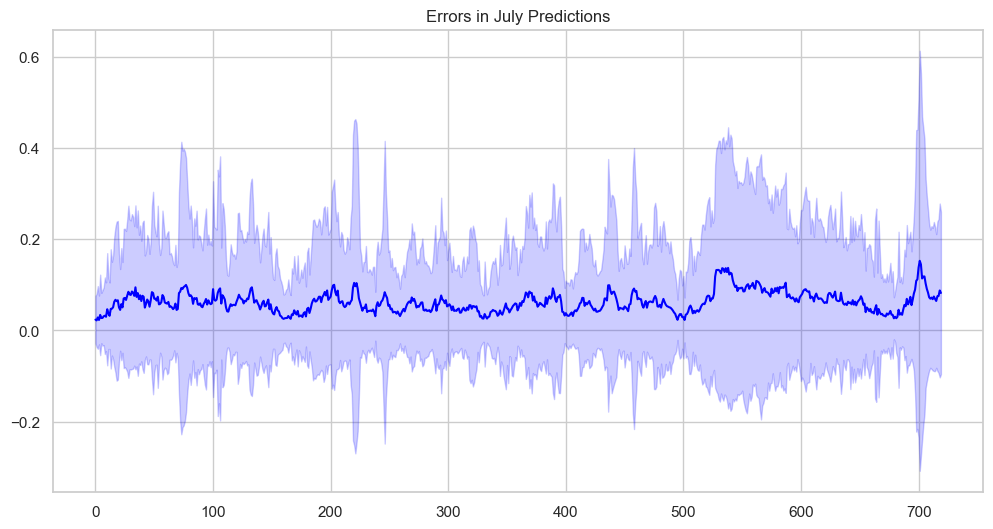

In [ ]:
errors = preds_july_np - true_july_np
error_mean = np.mean(errors, axis=0)
error_std = np.std(errors, axis=0)
abs_errors = np.abs(errors)
abs_error_mean = np.mean(abs_errors, axis=0)
abs_error_std = np.std(abs_errors, axis=0)

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
plt.plot(abs_error_mean, label='Mean Error', color='blue')
# plt.fill_between(range(len(abs_error_mean)), abs_error_mean - abs_error_std, abs_error_mean + abs_error_std, color='blue', alpha=0.2)
plt.title('Errors in July Predictions')

In [28]:
preds_august_np = preds_august_np.T

In [ ]:
pd.DataFrame(preds_august_np).to_csv('data/predictions/august_predictions.csv', index=False)